In [33]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn import tree
from sklearn.model_selection import train_test_split as tts


In [34]:
df = pd.read_csv("BankChurners.csv")
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],axis='columns')
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education_Level']= le.fit_transform(df['Education_Level'])
df['Gender']= le.fit_transform(df['Gender'])
df['Card_Category']= le.fit_transform(df['Card_Category'])
df['Income_Category']= le.fit_transform(df['Income_Category'])
df['Marital_Status']= le.fit_transform(df['Marital_Status'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [36]:
k=df.groupby('Attrition_Flag').mean()
print(df[['Attrition_Flag','Gender']].groupby('Attrition_Flag').count())
k

                Gender
Attrition_Flag        
0                 8500
1                 1627


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,,,,,
0,46.262118,0.479059,2.335412,3.092118,1.457412,2.852353,0.181647,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
1,46.659496,0.428396,2.402581,3.119852,1.494776,2.924401,0.170252,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475


In [37]:

X=df.drop(['Attrition_Flag'],axis='columns')
y=df['Attrition_Flag']

In [38]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [39]:
testdf = pd.concat([X_test,y_test],axis='columns')
k=testdf.groupby('Attrition_Flag').mean()
print(testdf[['Attrition_Flag','Gender']].groupby('Attrition_Flag').count())
k

                Gender
Attrition_Flag        
0                 1699
1                  327


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,,,,,
0,46.330194,0.480871,2.339023,3.058858,1.454974,2.868158,0.185992,35.952325,3.951148,2.322543,2.349029,8919.167863,1267.563273,7651.604591,0.772034,4547.053561,68.373161,0.743956,0.288260
1,46.174312,0.455657,2.470948,3.198777,1.455657,2.862385,0.119266,35.844037,3.415902,2.685015,2.911315,7775.096636,693.957187,7081.139450,0.686859,3010.727829,44.324159,0.535239,0.159239


In [40]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
ypredicted=model.predict(X_test)
model.score(X_test,y_test)


0.93928923988154

In [42]:
from sklearn.metrics import recall_score

# Calculate Recall
recall = recall_score(y_test, ypredicted)
print("Recall:", recall)

Recall: 0.7920489296636085


Text(95.72222222222221, 0.5, 'Truth')

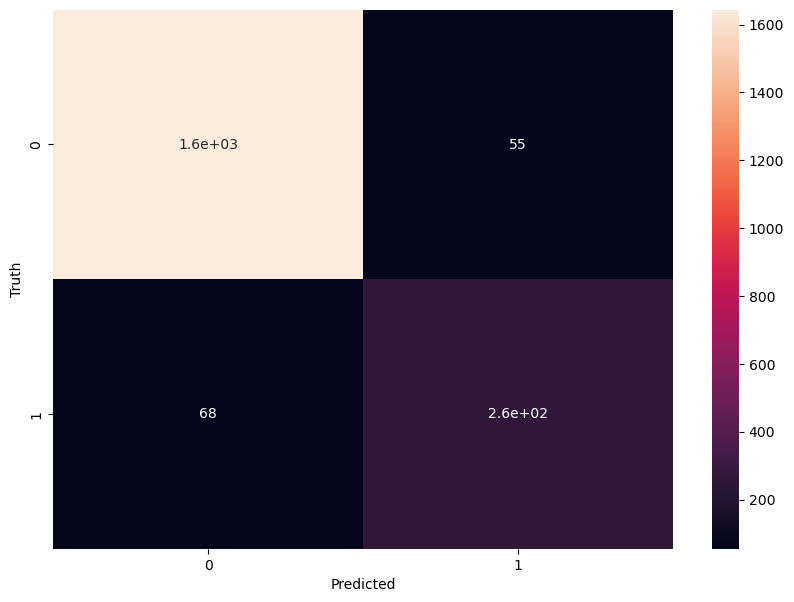

In [43]:
matrix = cm(y_test,ypredicted)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

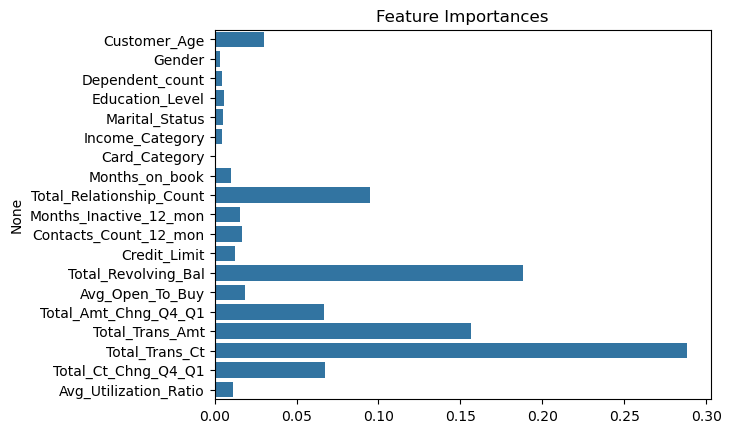

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


### 🔍 Model Evaluation Summary

- **Overall Accuracy**: **93.39%**
  The model performs well in terms of overall accuracy, correctly predicting the outcome for most consumers.

- **Recall (Sensitivity)**: **79.20%**
  Since our goal is to detect **consumer churn**, **Recall is the most important metric** for us. A recall of 82% means that the model is successfully identifying the majority of customers who are likely to churn.

- **Why Recall Matters More**
  In this scenario, **False Negatives** (i.e., predicting a customer will stay when they actually leave) are **more harmful** than False Positives. A false negative means we lose a customer without trying to retain them, which is what we want to avoid.  
  On the other hand, a **False Positive** may result in unnecessary retention efforts, which is acceptable.